# Import Library

This section imports the essential libraries and tools required for data analysis, preprocessing, and model development. Each library serves specific purposes:

- **Pandas (`pd`)**: For data manipulation and analysis.
- **NumPy (`np`)**: For numerical computations and array operations.
- **Matplotlib (`plt`)**: For creating visualizations and plots.
- **Seaborn (`sns`)**: For advanced data visualizations with statistical insights.
- **TensorFlow (`tf`)**: For building and training deep learning models.
- **Warnings**: To suppress unnecessary warnings for a cleaner output.
- **Joblib**: For saving and loading model and preprocessing objects.
- **Scikit-learn**:
  - **`compute_class_weight`**: To handle class imbalance in the data.
  - **Preprocessing tools** (`MinMaxScaler`, `LabelEncoder`, `MultiLabelBinarizer`, `StandardScaler`): For data scaling, encoding, and transformation.
  - **`train_test_split`**: For splitting datasets into training and testing sets.
  - **`KMeans`**: For clustering the data.
- **TensorFlow/Keras Components**:
  - **Model Components** (`regularizers`): For designing and building neural network models.

Additionally, options are configured for better readability and exploration of the dataset.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
import joblib
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
pd.set_option('display.float', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_columns', 50)

# Gathering Data

In this section, the dataset is loaded from a specified file path into a DataFrame for further analysis. The data serves as the foundation for exploring, preprocessing, and building models in this project.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Dataset_CP/game.csv'
game_df = pd.read_csv(file_path)

# Assessing Data

This section involves examining the dataset to understand its structure and identify potential issues. Key activities include:

- Viewing the first few rows of the dataset to understand its contents and structure.
- Displaying a concise summary of the dataset to review column names, data types, and non-null counts.
- Checking the shape of the dataset to determine the number of rows and columns.
- Generating a statistical summary of numerical columns to observe data distributions and detect outliers.
- Identifying missing values in each column for handling during preprocessing.
- Counting duplicate rows to ensure data integrity and eliminate redundancies.

These steps provide a comprehensive overview of the dataset and its quality.


In [ ]:
# Displays the first 5 rows of the DataFrame `game_df`
game_df.head()

,Name,Price,Release_date,Review_no,Review_type,Tags,Description
0,Black Myth: Wukong,59.99,2024-08-20,"574,097.00",Overwhelmingly Positive,"Mythology,Action RPG,Action,Souls-like,RPG,Com...",Black Myth: Wukong is an action RPG rooted in ...
1,"Warhammer 40,000: Space Marine 2",NaN,2024-09-09,"23,591.00",Very Positive,"Warhammer 40K,Action,Adventure,Third-Person Sh...",Embody the superhuman skill and brutality of a...
2,Counter-Strike 2,0.00,2012-08-21,"8,286,153.00",Very Positive,"FPS,Shooter,Multiplayer,Competitive,Action,Tea...","For over two decades, Counter-Strike has offer..."
3,Warframe,0.00,NaN,"589,527.00",Very Positive,"Free to Play,Action RPG,Looter Shooter,Third-P...",Awaken as an unstoppable warrior and battle al...
4,Grand Theft Auto V,10.48,2015-04-14,"1,703,156.00",Very Positive,"Open World,Action,Multiplayer,Crime,Automobile...",Grand Theft Auto V for PC offers players the o...


In [ ]:
# Displays a concise summary of the DataFrame `game_df`
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7812 entries, 0 to 7811
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          7812 non-null   object 
 1   Price         7761 non-null   float64
 2   Release_date  7793 non-null   object 
 3   Review_no     7765 non-null   float64
 4   Review_type   7765 non-null   object 
 5   Tags          7812 non-null   object 
 6   Description   7386 non-null   object 
dtypes: float64(2), object(5)
memory usage: 427.3+ KB


In [ ]:
# Returns the shape of the DataFrame `game_df`
game_df.shape

(7812, 7)

In [ ]:
# Statistical summary of the numerical columns
game_df.describe()

,Price,Review_no
count,"7,761.00","7,765.00"
mean,8.06,"8,875.16"
std,10.13,"111,724.95"
min,0.00,10.00
25%,2.49,59.00
50%,5.49,270.00
75%,8.49,"1,719.00"
max,139.99,"8,286,153.00"


In [ ]:
# Counts missing values in game_df columns
game_df.isna().sum()

,0
Name,0
Price,51
Release_date,19
Review_no,47
Review_type,47
Tags,0
Description,426


In [ ]:
# Counts duplicate rows in game_df
game_df.duplicated().sum()

0

# Cleaning Data

This section focuses on cleaning the dataset to ensure its quality and readiness for analysis and modeling. Key steps include:

- **Handling Missing Values**:
  - Filling missing numerical values (e.g., `Price`) with statistical measures like mean or interpolation.
  - Dropping rows with missing values in critical columns (e.g., `Release_date`, `tipe_review`).

- **Outlier Treatment**:
  - Visualizing numerical columns using boxplots.
  - Capping outliers within the 1.5*IQR range to reduce their impact.

- **Data Transformation**:
  - Extracting and converting dates into a structured format (e.g., year from `Release_date`).
  - Encoding categorical columns for better compatibility with analysis and modeling.

- **Currency Conversion**:
  - Adjusting `Price` values to IDR based on historical exchange rates.

- **Column Adjustments**:
  - Dropping unnecessary columns for simplification.
  - Renaming columns to more descriptive and contextually relevant names.

- **Deduplication**:
  - Identifying and removing duplicate rows to maintain data integrity.

These steps ensure that the dataset is clean, consistent, and well-structured, enabling accurate and efficient analysis.


In [ ]:
# Fills missing 'Price' values with the column mean
game_df['Price'].fillna(game_df['Price'].mean(), inplace=True)

In [ ]:
# Drops rows with missing 'Release_date' values
game_df.dropna(subset=['Release_date'], inplace=True)

In [ ]:
# Counts remaining missing values in game_df
game_df.isna().sum()

,0
Name,0
Price,0
Release_date,0
Review_no,47
Review_type,47
Tags,0
Description,421


In [ ]:
# Interpolates missing values in 'Review_no' and 'Review_type' using linear method
game_df[['Review_no', 'Review_type']] = game_df[['Review_no', 'Review_type']].interpolate(method='linear')

In [ ]:
# Returns the shape of the DataFrame `game_df`
game_df.shape

(7793, 7)

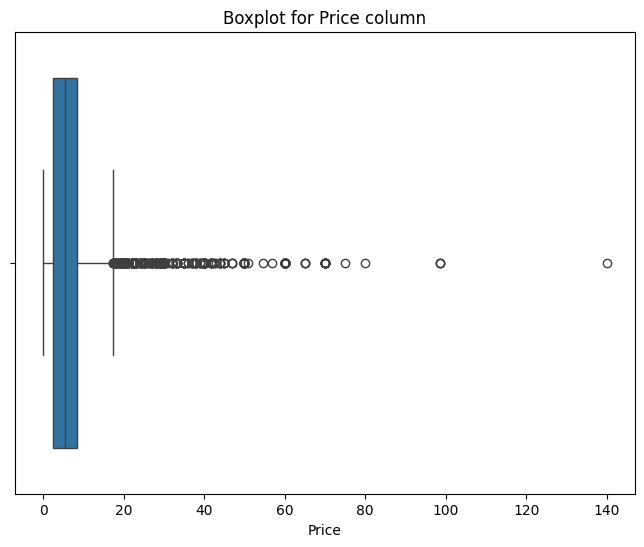

In [ ]:
# Rename the variable according to the dataset used
numerical_columns = ["Price"]

plt.figure(figsize=(8, 6))  # Figure size
sns.boxplot(x=game_df["Price"])  # Boxplot for Price column
plt.title('Boxplot for Price column')  # Plot title
plt.xlabel('Price')  # Labels for x-axis
plt.show()  # Show plot

In [ ]:
# Caps outliers in 'Price' column within 1.5*IQR range
def impute_boundary_outliers(game_df, columns):
    for col in columns:
        Q1 = game_df[col].quantile(0.25)
        Q3 = game_df[col].quantile(0.75)
        IQR = Q3 - Q1
        maximum = Q3 + (1.5 * IQR)
        minimum = Q1 - (1.5 * IQR)

        kondisi_lower_than = game_df[col] < minimum
        kondisi_more_than = game_df[col] > maximum

        game_df[col] = game_df[col].mask(cond=kondisi_more_than, other=maximum)
        game_df[col] = game_df[col].mask(cond=kondisi_lower_than, other=minimum)

impute_boundary_outliers(game_df, ['Price'])
print("Data after boundary value imputation:")
print(game_df.shape)

Data after boundary value imputation:
(7793, 7)


In [ ]:
# Statistical summary of the numerical columns
game_df.describe()

,Price,Review_no
count,"7,793.00","7,793.00"
mean,6.52,"8,963.56"
std,5.10,"111,701.44"
min,0.00,10.00
25%,2.59,59.00
50%,5.49,271.00
75%,8.49,"1,720.00"
max,17.34,"8,286,153.00"


In [ ]:
# Filters and displays rows where 'Price' is zero
zero_price_data = game_df[game_df['Price'] == 0.00]
zero_price_data

,Name,Price,Release_date,Review_no,Review_type,Tags,Description
2,Counter-Strike 2,0.00,2012-08-21,"8,286,153.00",Very Positive,"FPS,Shooter,Multiplayer,Competitive,Action,Tea...","For over two decades, Counter-Strike has offer..."
6,PUBG: BATTLEGROUNDS,0.00,2017-12-21,"2,423,411.00",Mixed,"Survival,Shooter,Battle Royale,Multiplayer,FPS...",Play PUBG: BATTLEGROUNDS for free.\n\nLand on ...
7,Dota 2,0.00,2013-07-09,"2,313,928.00",Very Positive,"Free to Play,MOBA,Multiplayer,Strategy,eSports...","Every day, millions of players worldwide enter..."
8,Once Human,0.00,2024-07-10,"84,045.00",Mostly Positive,"Survival,Open World,Multiplayer,Free to Play,C...",Once Human is a multiplayer open-world surviva...
10,Apex Legends™,0.00,2020-11-05,"943,377.00",Mixed,"Free to Play,Battle Royale,Multiplayer,FPS,Sho...","Apex Legends is the award-winning, free-to-pla..."
11,The First Descendant,0.00,2024-06-30,"84,281.00",Mixed,"Free to Play,Looter Shooter,Sexual Content,Mul...",The First Descendant is a third-person looter ...
16,NARAKA: BLADEPOINT,0.00,2021-08-12,"249,551.00",Mostly Positive,"Battle Royale,Multiplayer,Martial Arts,PvP,Act...",Dive into the legends of the Far East in NARAK...
24,Team Fortress 2,0.00,2007-10-10,"1,116,616.00",Very Positive,"Free to Play,Hero Shooter,Multiplayer,FPS,Shoo...",Nine distinct classes provide a broad range of...
31,Destiny 2,0.00,2019-10-01,"611,186.00",Very Positive,"Free to Play,Open World,Looter Shooter,Multipl...",Destiny 2 is an action MMO with a single evolv...
35,Limbus Company,0.00,2023-02-27,"36,506.00",Very Positive,"Lore-Rich,Story Rich,Turn-Based Tactics,RPG,Tu...","As the Executive Manager of Limbus Company, le..."


In [ ]:
# Drops rows where 'Price' is zero
game_df.drop(game_df[game_df['Price'] == 0.00].index, inplace=True)

In [ ]:
# Statistical summary of the numerical columns
game_df.describe()

,Price,Review_no
count,"7,482.00","7,482.00"
mean,6.79,"6,358.39"
std,5.03,"43,372.71"
min,0.44,10.00
25%,2.99,57.00
50%,5.49,243.00
75%,8.49,"1,509.75"
max,17.34,"1,703,156.00"


In [ ]:
# Extracts year from 'Release_date' and converts to Int64 type
game_df['year'] = pd.to_datetime(game_df['Release_date'], format='%Y-%m-%d', errors='coerce').dt.year
game_df['year'] = game_df['year'].astype('Int64')

In [ ]:
# Sorts 'year' column in ascending order
game_df['year'].sort_values(ascending=True)

,year
3204,1997
819,1998
1715,1999
1165,1999
424,2000
1741,2000
1252,2001
1756,2001
1717,2001
1967,2001


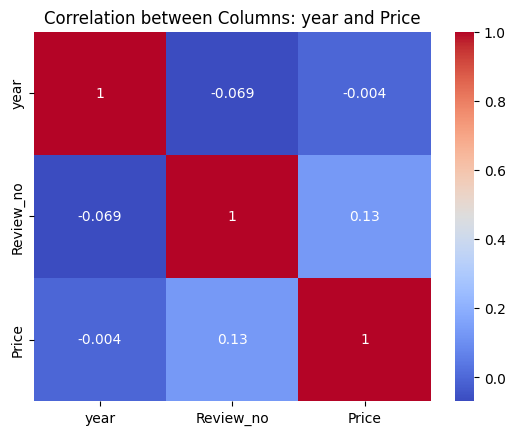

In [ ]:
# Plots correlation heatmap for 'year', 'Review_no', and 'Price'
selected_columns = ['year', 'Review_no', 'Price']
correlation_matrix = game_df[selected_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Columns: year and Price')
plt.show()

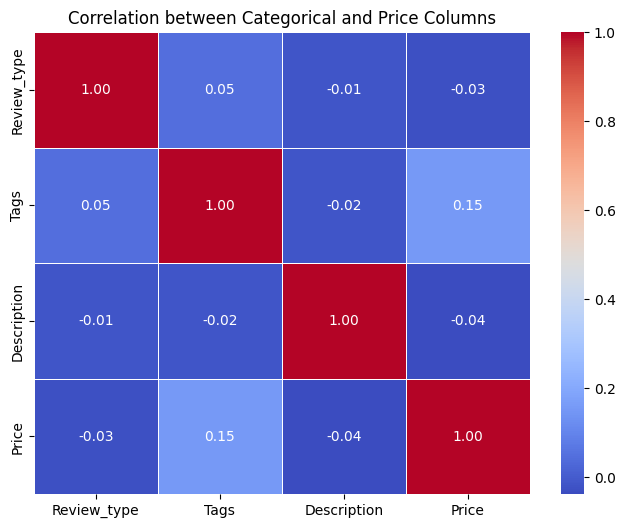

In [ ]:
# Encodes categorical columns and plots their correlation with 'Price'
temp_df = game_df.copy()

label_encoder = LabelEncoder()

temp_df['Name'] = label_encoder.fit_transform(temp_df['Name'])
temp_df['Release_date'] = label_encoder.fit_transform(temp_df['Release_date'])
temp_df['Review_type'] = label_encoder.fit_transform(temp_df['Review_type'])
temp_df['Tags'] = label_encoder.fit_transform(temp_df['Tags'])
temp_df['Description'] = label_encoder.fit_transform(temp_df['Description'])

selected_columns = ['Review_type', 'Tags', 'Description', 'Price']

correlation_matrix = temp_df[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Categorical and Price Columns')
plt.show()

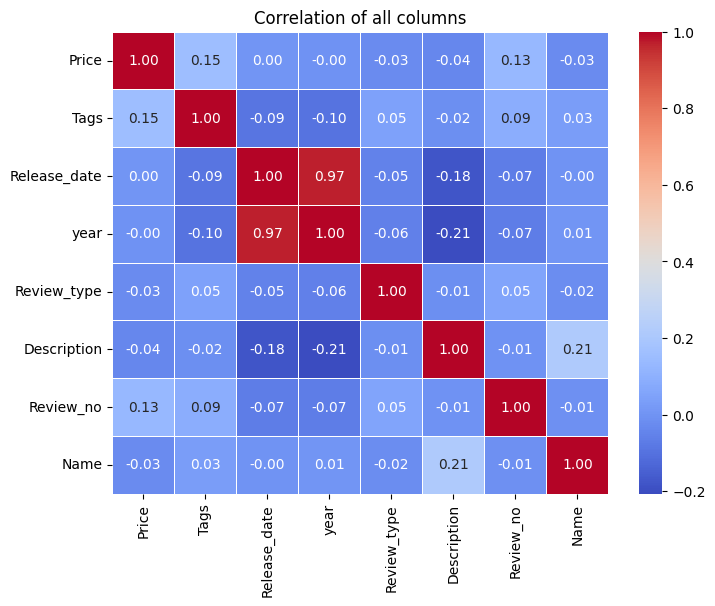

In [ ]:
# Plots correlation heatmap for all selected columns
selected_columns = ['Price','Tags', 'Release_date', 'year', 'Review_type', 'Description', 'Review_no', 'Name']

correlation_matrix = temp_df[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of all columns')
plt.show()

In [ ]:
# Converts 'Price' to IDR based on year-specific exchange rates
def convert_rp(df, price_column, year_column, exchange_rates):
    for start_year, end_year, exchange_rate in exchange_rates:
        df.loc[(df[year_column] >= start_year) & (df[year_column] <= end_year), price_column] *= exchange_rate
    return df

exchange_rates = [
    (1998, 2013, 9000),
    (2014, 2018, 13000),
    (2019, 2025, 15000)
]

game_df = convert_rp(game_df, 'Price', 'year', exchange_rates)

In [ ]:
exchange = 2000

def convert_rp(df, price_column, year_column):
    df.loc[df[year_column] == 1997, price_column] = df.loc[df[year_column] == 1997, price_column].apply(lambda x: x * exchange)
    return df

game_df = convert_rp(game_df, 'Price', 'year')

In [ ]:
# Displays a concise summary of the DataFrame `game_df`
game_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7482 entries, 0 to 7811
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          7482 non-null   object 
 1   Price         7482 non-null   float64
 2   Release_date  7482 non-null   object 
 3   Review_no     7482 non-null   float64
 4   Review_type   7435 non-null   object 
 5   Tags          7482 non-null   object 
 6   Description   7061 non-null   object 
 7   year          7482 non-null   Int64  
dtypes: Int64(1), float64(2), object(5)
memory usage: 533.4+ KB


In [ ]:
# Drops specified columns and displays remaining columns
game_df.drop(columns=['Release_date', 'Review_no', 'Description', 'year'], inplace=True)
print(game_df.columns)

Index(['Name', 'Price', 'Review_type', 'Tags'], dtype='object')


In [ ]:
# Renames columns to more descriptive names in Indonesian
game_df.rename(columns={
    'Price': 'harga',
    'Name': 'nama',
    'Review_type': 'tipe_review',
    'Tags': 'kata_kunci'
}, inplace=True)

In [ ]:
# Statistical summary of the numerical columns
game_df.describe()

,harga
count,"7,482.00"
mean,"94,603.17"
std,"71,439.34"
min,"4,590.00"
25%,"38,870.00"
50%,"76,410.00"
75%,"122,850.00"
max,"260,100.00"


In [ ]:
# Counts duplicate rows in the DataFrame
game_df.duplicated().sum()

0

In [ ]:
# Returns the shape of the DataFrame `game_df`
game_df.shape

(7482, 4)

In [ ]:
# Displays a concise summary of the DataFrame `game_df`
game_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7482 entries, 0 to 7811
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nama         7482 non-null   object 
 1   harga        7482 non-null   float64
 2   tipe_review  7435 non-null   object 
 3   kata_kunci   7482 non-null   object 
dtypes: float64(1), object(3)
memory usage: 292.3+ KB


In [ ]:
# Counts missing values in each column
game_df.isna().sum()

,0
nama,0
harga,0
tipe_review,47
kata_kunci,0


In [ ]:
game_df.dropna(subset=['tipe_review'], inplace=True)

In [ ]:
# Displays a concise summary of the DataFrame `game_df`
game_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7435 entries, 0 to 7811
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nama         7435 non-null   object 
 1   harga        7435 non-null   float64
 2   tipe_review  7435 non-null   object 
 3   kata_kunci   7435 non-null   object 
dtypes: float64(1), object(3)
memory usage: 290.4+ KB


In [ ]:
# Statistical summary of the numerical columns
game_df.describe()

,harga
count,"7,435.00"
mean,"94,107.11"
std,"71,081.65"
min,"4,590.00"
25%,"38,870.00"
50%,"74,850.00"
75%,"122,850.00"
max,"260,100.00"


# Save a Clean Dataset

In this section, the cleaned dataset is saved as a CSV file. This ensures that the preprocessed data is preserved for future analysis and modeling, eliminating the need to repeat the cleaning steps. The saved file serves as a reliable and reusable data source.


In [ ]:
# Saves DataFrame to CSV file
game_df.to_csv("game_clean.csv", index=False)
print("Data saved successfully")

Data saved successfully


# Load Dataset

In this section, the cleaned dataset is loaded into the environment from the specified file path. This allows for further analysis and modeling based on the preprocessed data.


In [ ]:
game = pd.read_csv('/content/drive/MyDrive/Dataset_CP/game_clean.csv')

# Preprocessing

This section prepares the dataset for machine learning by applying the following steps:

- **Encoding Categorical Data**:
  - `tipe_review` is encoded using `LabelEncoder` to transform categories into numerical values.
  - `kata_kunci` is treated as multi-label data, split by commas, and encoded using `MultiLabelBinarizer` to create one-hot encoded features.

- **Normalizing Numerical Data**:
  - `harga` is normalized using `StandardScaler` to ensure features have a consistent scale.

- **Saving Preprocessing Objects**:
  - `LabelEncoder`, `MultiLabelBinarizer`, and `Scaler` objects are saved to a file (`scaler_game.pkl`) for future use.

- **Clustering with KMeans**:
  - Features, including normalized price, encoded review types, and keywords, are used for clustering the dataset into 10 groups.
  - Clusters with insufficient data points are filtered out.

- **Splitting Data**:
  - Features and cluster labels are split into training and testing sets for model evaluation.

- **Handling Class Imbalance**:
  - Class weights are computed to address imbalances in the data, ensuring that the model treats each class appropriately during training.

These preprocessing steps ensure the data is clean, structured, and ready for model training and evaluation.


In [ ]:
# Encode categorical data
# Encode type_review using LabelEncoder
review_encoder = LabelEncoder()
game['tipe_review_encoded'] = review_encoder.fit_transform(game['tipe_review'])

In [ ]:
# Encode keywords as multi-label features
mlb = MultiLabelBinarizer()
keywords_split = game['kata_kunci'].apply(lambda x: x.split(','))  # Assumed keywords separated by commas
keywords_encoded = mlb.fit_transform(keywords_split)
keywords_df = pd.DataFrame(keywords_encoded, columns=mlb.classes_)
game = pd.concat([game, keywords_df], axis=1)

In [ ]:
# Price normalization
scaler = StandardScaler()
game['harga_normalized'] = scaler.fit_transform(game[['harga']])

In [ ]:
# Save LabelEncoder, MultiLabelBinarizer, and Scaler
joblib.dump({
    'review_encoder': review_encoder,
    'keywords_mlb': mlb,
    'scaler': scaler
}, 'scaler_game.pkl')

['scaler_game.pkl']

In [ ]:
# Clustering with KMeans
feature_columns = ['harga_normalized', 'tipe_review_encoded'] + list(keywords_df.columns)
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
game['cluster'] = kmeans.fit_predict(game[feature_columns])

In [ ]:
# Save KMeans model
joblib.dump(kmeans, 'kmeans_game.pkl')

['kmeans_game.pkl']

In [ ]:
# Filter clusters with enough data
cluster_counts = game['cluster'].value_counts()
valid_clusters = cluster_counts[cluster_counts > 1].index
game = game[game['cluster'].isin(valid_clusters)]

In [ ]:
# Split features and labels
features = game[feature_columns].values
labels = game['cluster'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

In [ ]:
# Class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Modelling

This section involves building, training, and evaluating a Neural Network model for clustering:

- **Model Architecture**:
  - A Sequential Neural Network is built with:
    - An input layer based on the preprocessed features.
    - Hidden layers with:
      - `relu` activation for non-linearity.
      - Batch normalization to stabilize and speed up training.
      - Dropout for regularization and to prevent overfitting.
      - L2 regularization to further reduce overfitting.
    - An output layer with `softmax` activation for multi-class classification (clustering).

- **Model Compilation**:
  - The model is compiled using:
    - Adam optimizer with a learning rate of 0.0001.
    - Sparse categorical cross-entropy as the loss function.
    - Accuracy as the evaluation metric.

- **Callbacks**:
  - **Early Stopping**: Monitors validation loss and stops training when no improvement is observed for 10 epochs, restoring the best weights.
  - **Learning Rate Scheduler**: Reduces the learning rate by a factor of 0.5 if validation loss plateaus, ensuring efficient convergence.

- **Training**:
  - The model is trained using the preprocessed training data, incorporating validation and class weights to handle imbalanced clusters.

This step sets up a robust Neural Network model to classify and analyze the data into meaningful clusters.


In [ ]:
# Build Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(n_clusters, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          56,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,122 (258.29 KB)

 Trainable params: 65,738 (256.79 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-6)

In [ ]:
# Train Neural Network
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=8,
                    validation_split=0.2,
                    class_weight=class_weight_dict,
                    verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/100
595/595 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1811 - loss: 5.0203 - val_accuracy: 0.5832 - val_loss: 3.4663 - learning_rate: 1.0000e-04
Epoch 2/100
595/595 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4807 - loss: 3.5396 - val_accuracy: 0.7277 - val_loss: 2.8611 - learning_rate: 1.0000e-04
Epoch 3/100
595/595 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6081 - loss: 2.9937 - val_accuracy: 0.8025 - val_loss: 2.4743 - learning_rate: 1.0000e-04
Epoch 4/100
595/595 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6703 - loss: 2.6775 - val_accuracy: 0.8403 - val_loss: 2.1864 - learning_rate: 1.0000e-04
Epoch 5/100
595/595 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7284 - loss: 2.3972 - val_accuracy: 0.8681 - val_loss: 1.9595 - learning_rate: 1.0000e-04
Epoch 6/100
595/595 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7527 - loss: 2.1810 - val_accuracy: 0.8866 - val_loss: 1.7701 - learning_rate: 1.0000e-04
Epoch 7/100
595/595 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc

# Result and Evaluation

This section evaluates the performance of the Neural Network model and visualizes the training process:

- **Evaluation Metrics**:
  - The model achieved a **test accuracy of 95.09%** and a **test loss of 0.22**, demonstrating strong performance on the test dataset.

- **Training Results Visualization**:
  - **Accuracy Plot**:
    - Illustrates the progression of training and validation accuracy over epochs.
    - Shows consistent improvement with validation accuracy closely following training accuracy, indicating minimal overfitting.
  - **Loss Plot**:
    - Depicts the reduction in training and validation loss over epochs.
    - Suggests effective convergence with stable learning behavior.

These results validate the model's capability to accurately classify data into clusters and indicate its robustness on unseen data.


In [ ]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9500 - loss: 0.2283
Test Loss: 0.22488372027873993, Test Accuracy: 0.9509078860282898


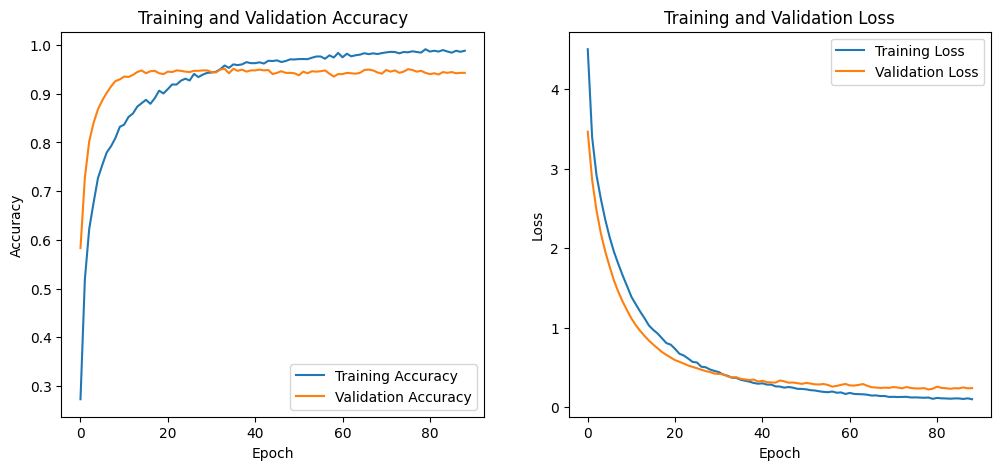

In [ ]:
# Plot Training Results
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Prediction

This section implements a recommendation system to suggest games based on the user's criteria:

- **Recommendation Function**:
  - Filters games within a specified budget range (with adjustable tolerance).
  - Matches games based on user-provided keywords and review type.
  - If more than the desired number of recommendations (`top_n`), sorts the results by price and selects the top games.

- **User Interaction**:
  - Users input their budget, keywords (separated by commas), and preferred review type.
  - The system returns a list of games that match the criteria, including the game's name, price, keywords, and review type.
  - If no games match the criteria, an appropriate message is displayed.

This feature provides personalized game recommendations, helping users discover games that fit their preferences and budget.


In [ ]:
# Game Recommendations
def recommend_game(budget, keywords, review_type, tolerance=0.1, top_n=5):
    """
    Fungsi untuk merekomendasikan game berdasarkan budget, kata kunci, dan tipe review.
    """
    min_price = budget * (1 - tolerance)
    max_price = budget * (1 + tolerance)

    # Filter data by price
    recommendations = game[(game['harga'] >= min_price) & (game['harga'] <= max_price)]

    # Filter by type_review and keywords
    recommendations = recommendations[
        (recommendations['tipe_review'] == review_type) &
        (recommendations['kata_kunci'].str.contains('|'.join(keywords)))
    ]

    # If more than top_n, sort by price
    if not recommendations.empty:
        recommendations = recommendations.sort_values(by='harga').head(top_n)
        return recommendations[['nama', 'harga', 'kata_kunci', 'tipe_review']]
    else:
        return pd.DataFrame(columns=['nama', 'harga', 'kata_kunci', 'tipe_review'])

# Example of using recommendations
example_budget = float(input("Masukkan anggaran Anda (dalam IDR): "))
example_keywords = input("Masukkan kata kunci (pisahkan dengan koma): ").split(',')
example_review_type = input("Masukkan tipe review (contoh: 'Very Positive'): ")

recommendations = recommend_game(example_budget, example_keywords, example_review_type)

if not recommendations.empty:
    print("\nRekomendasi Game yang Sesuai dengan Kriteria Anda:")
    print(recommendations)
else:
    print("Tidak ada game yang sesuai dengan kriteria Anda.")

Masukkan anggaran Anda (dalam IDR): 100000
Masukkan kata kunci (pisahkan dengan koma): Sport
Masukkan tipe review (contoh: 'Very Positive'): Very Positive

Rekomendasi Game yang Sesuai dengan Kriteria Anda:
                              nama     harga  \
5899            The Snowboard Game 90,870.00   
4490                   ARENA GODS® 90,870.00   
1612                  SpeedRunners 90,870.00   
6189  Charrua Soccer - Pro Edition 92,850.00   
228                Automobilista 2 97,350.00   

                                             kata_kunci    tipe_review  
5899  Sports,Racing,Action,Indie,Snowboarding,Snow,S...  Very Positive  
4490  Action,Sports,Indie,Fighting,Violent,Early Acc...  Very Positive  
1612  Multiplayer,Racing,Local Multiplayer,Indie,Com...  Very Positive  
6189  Arcade,Football (Soccer),Anime,Action,Cartoon,...  Very Positive  
228   Racing,Simulation,Sports,VR,Automobile Sim,Ind...  Very Positive  


# Save Model

In this section, the trained Neural Network model is saved in multiple formats for future use:

- **H5 Format**: Saves the model architecture, weights, and training configuration in a single file, ensuring compatibility across different platforms.
- **Keras Format**: Stores the model in TensorFlow's preferred format, allowing for greater flexibility and scalability.

These saved models enable seamless deployment and reuse without the need to retrain the model, ensuring efficiency in future applications.


In [ ]:
# Saves model to h5
model.save("game_fix.h5")
print("Model saved successfully in h5")

Model saved successfully in h5


In [ ]:
# Saves model to keras
model.save("game_fix.keras")
print("Model saved successfully in keras")

Model saved successfully in keras
